In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

In [2]:
image1=files.upload()

Saving Lena_Image.png to Lena_Image.png


In [3]:
Lena=cv2.imread('/content/Lena_Image.png')

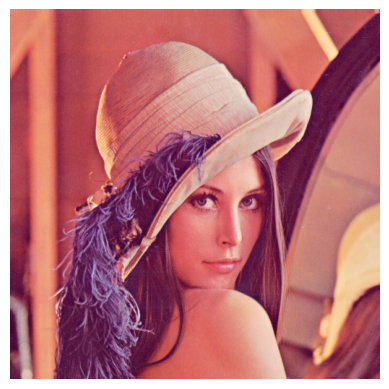

In [4]:
plt.imshow(cv2.cvtColor(Lena, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

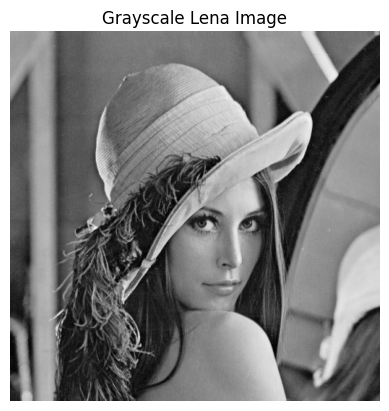

In [6]:
#Gray
gray = cv2.cvtColor(Lena, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Lena Image')
plt.show()

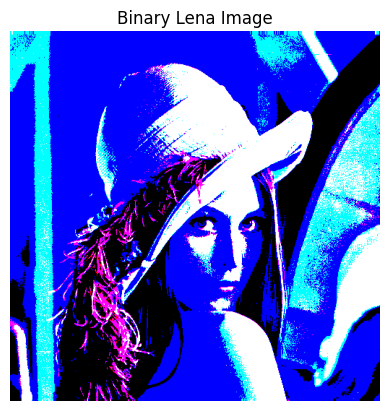

In [7]:
#Binary using threshold
_, binary_lena = cv2.threshold(Lena, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_lena, cmap='gray')
plt.axis('off')
plt.title('Binary Lena Image')
plt.show()

(-0.5, 511.5, 511.5, -0.5)

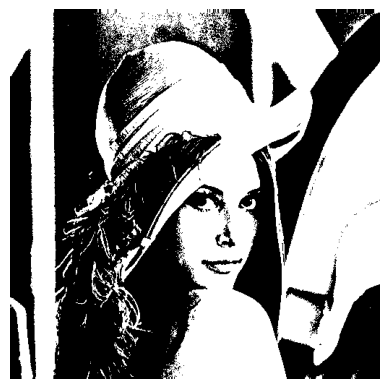

In [8]:
#Gray using threshold
_, gray_binary_lena = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(gray_binary_lena, cmap='gray')
plt.axis('off')

In [9]:
#Part2.1
img_blur = cv2.GaussianBlur(gray, (3,3), 0)

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
plt.imshow(sobelx, cmap='gray')
plt.imshow(sobely, cmap='gray')
plt.imshow(sobelxy, cmap='gray')
plt.axis('off')
plt.show()

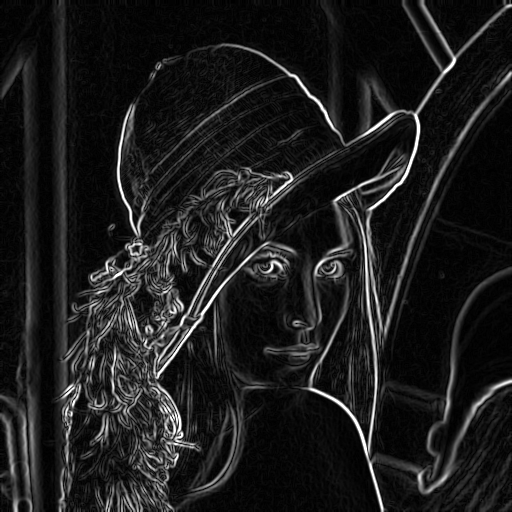

In [12]:
prewitt_x = cv2.filter2D(img_blur, cv2.CV_32F, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_y = cv2.filter2D(img_blur, cv2.CV_32F, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_edges = cv2.magnitude(prewitt_x, prewitt_y)

# Roberts Operator
roberts_x = cv2.filter2D(img_blur, cv2.CV_32F, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(img_blur, cv2.CV_32F, np.array([[0, 1], [-1, 0]]))
roberts_edges = cv2.magnitude(roberts_x, roberts_y)

prewitt_edges = cv2.convertScaleAbs(prewitt_edges)
roberts_edges = cv2.convertScaleAbs(roberts_edges)

cv2_imshow(prewitt_edges)
cv2_imshow(roberts_edges)

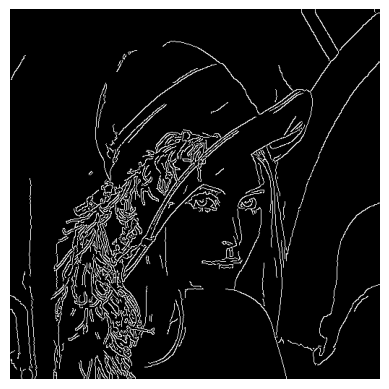

In [13]:
#Canny
edges = cv2.Canny(img_blur, 70, 135)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

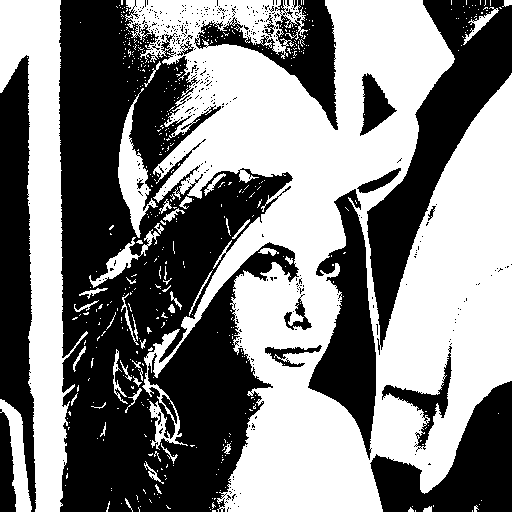

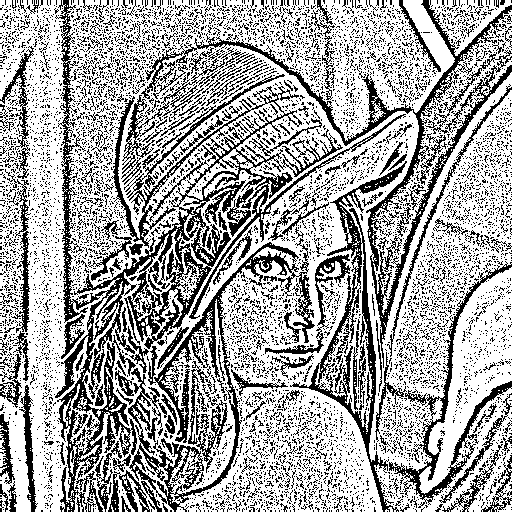

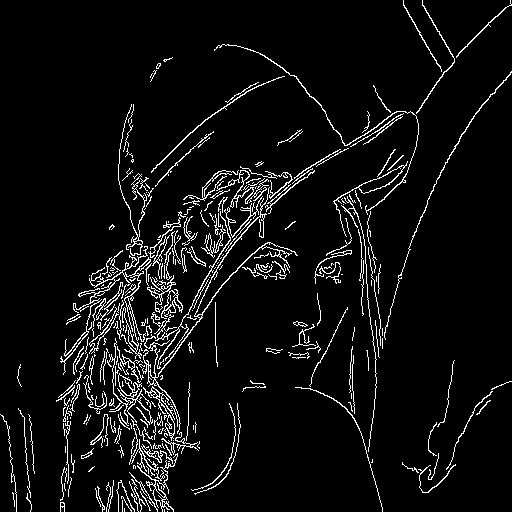

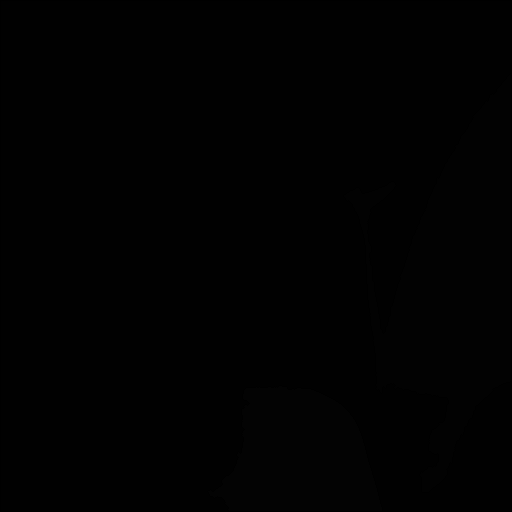

In [16]:
# Global Thresholding
_, global_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Canny Edge-Based Segmentation
canny_seg = cv2.Canny(gray, 100, 200)

# Watershed Segmentation
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_bg = cv2.dilate(binary, None, iterations=3)
sure_fg = np.uint8(sure_fg)
sure_bg = np.uint8(sure_bg)
unknown = cv2.subtract(sure_bg, sure_fg)
markers = cv2.connectedComponents(sure_fg.astype(np.uint8))[1]
markers = markers + 1
markers[unknown == 255] = 0
watershed_result = cv2.watershed(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR), markers)

# Display Results
cv2_imshow(global_thresh)
cv2_imshow(adaptive_thresh)
cv2_imshow(canny_seg)
cv2_imshow(watershed_result)
